<a href="https://colab.research.google.com/github/lathamithu/The_Sparks_Foundation/blob/main/GRIP_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *NAME : S. Meghana*
# *INTERNSHIP FUNCTION : Data Science & Business Analytics*

**TASK 6 : PREDICTION USING DECISION TREE ALGORITHM**

In [41]:
# importing the necessary libraries
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [42]:
# loading the dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [44]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [45]:
df.shape

(150, 6)

In [46]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [47]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

***Data cleaning***

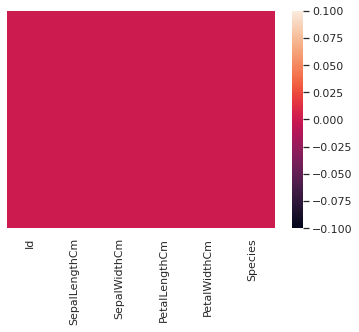

In [48]:
# checking for null entries
sns.heatmap(df.isnull(), yticklabels = False)

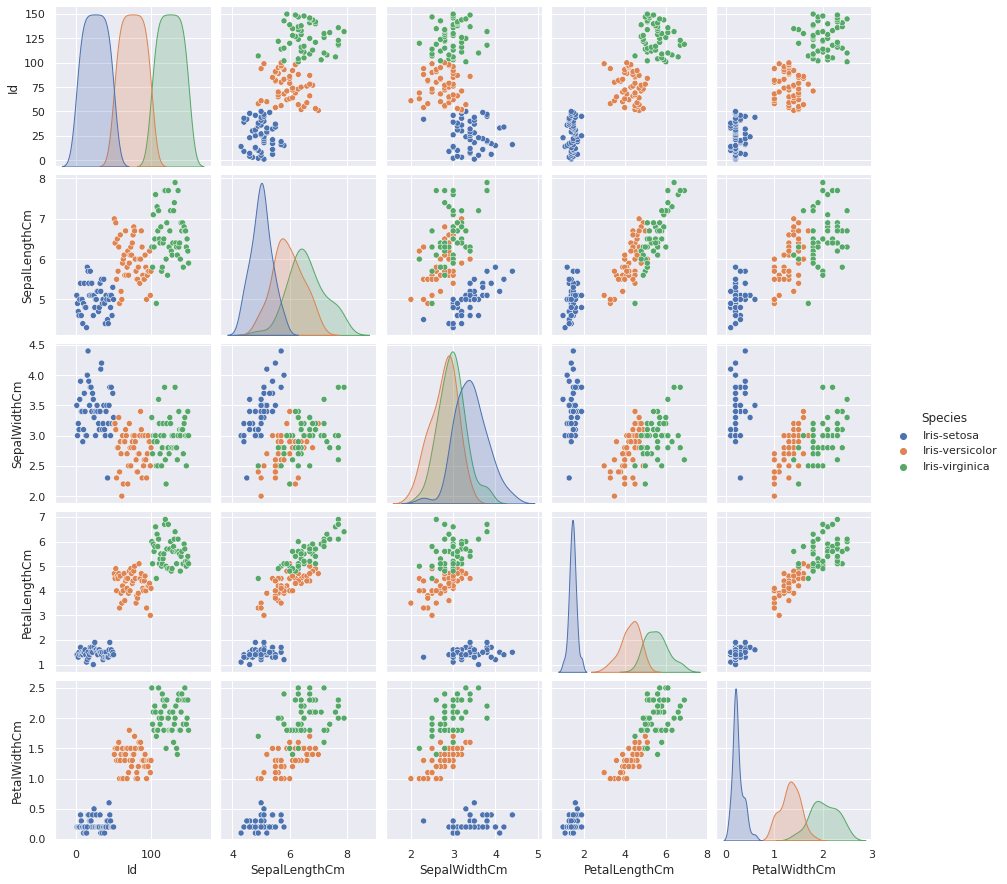

In [49]:
sns.pairplot(df, hue = 'Species')

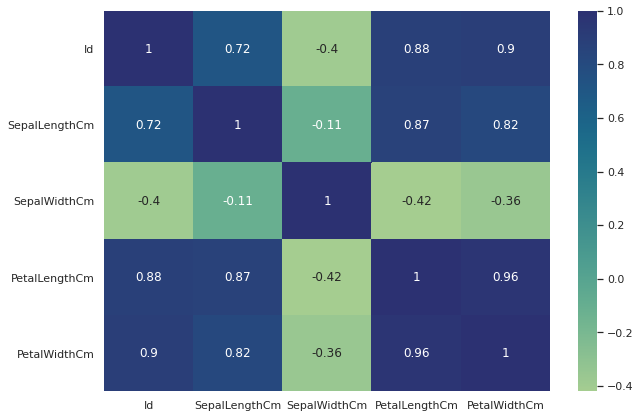

In [50]:
# finding the correlation between the variables
corr_matrix = df[df.columns].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix,cmap='crest',annot=True)

In [51]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [52]:
df.drop(["Id"],axis = 1, inplace = True)

***Data visualization***

[Text(0.5, 1.0, 'Species distribution')]

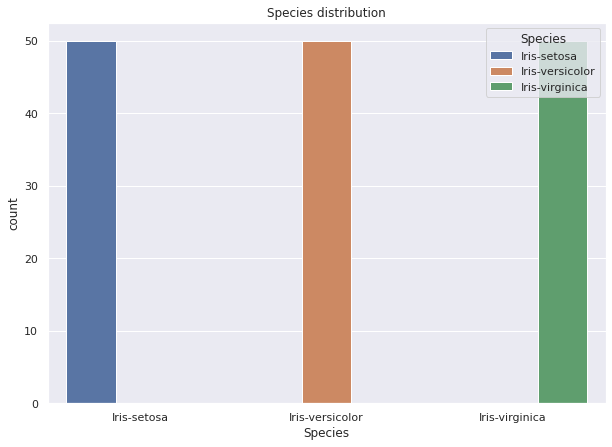

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Species', hue = 'Species', data = df).set(title='Species distribution')

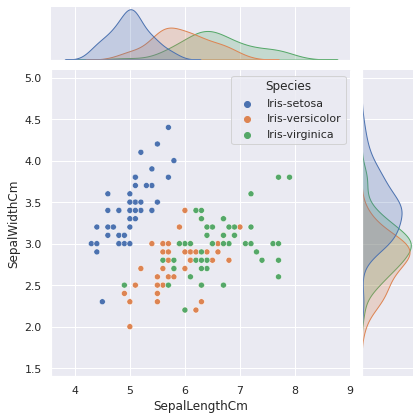

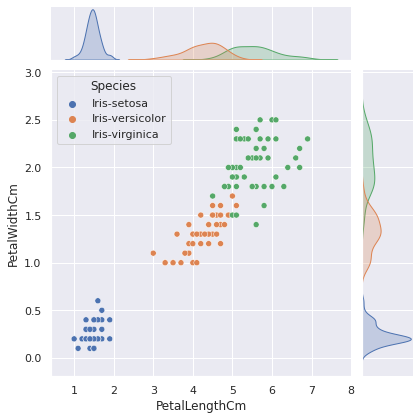

In [54]:
sns.jointplot(data = df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")
plt.show()
print()
sns.jointplot(data = df, x="PetalLengthCm", y="PetalWidthCm", hue="Species")
plt.show()

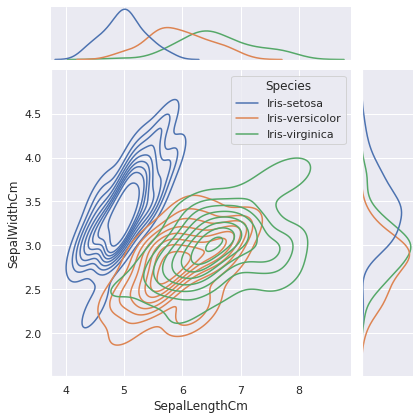

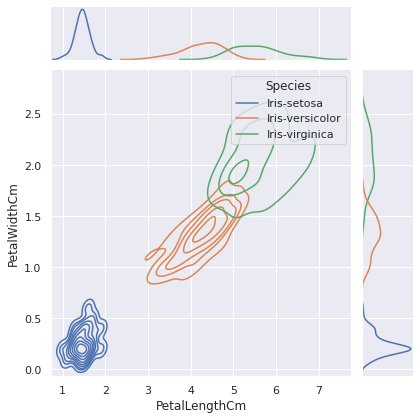

In [55]:
 sns.jointplot(data = df, x="SepalLengthCm", y="SepalWidthCm", hue="Species", kind="kde")
plt.show()
print()
sns.jointplot(data = df, x="PetalLengthCm", y="PetalWidthCm", hue="Species", kind="kde")
plt.show()

***Data preprocessing***

In [56]:
data = df.copy()
species = data["Species"].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [57]:
data["Species"] = data["Species"].replace({sp: s for s, sp in enumerate(species)})
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


***Splitting into train & test data***

In [58]:
x = data[list(data.columns[:4])]
y = data['Species']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [60]:
# Values to try for max_depth
max_depth_range = list(range(1, 6))
# Average RMSE for each value of max_depth
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
accuracy

[0.6,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556]

Text(0, 0.5, 'Accuracy')

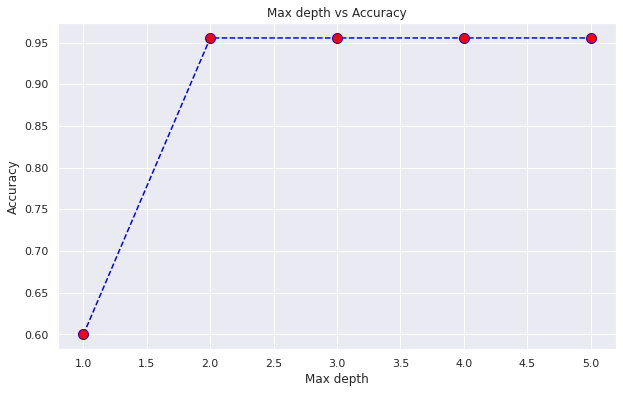

In [61]:
plt.figure(figsize = (10,6))
plt.plot(range(1,6), accuracy, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Max depth vs Accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Max depth can be any value above 2. Anyways we'll have the default value.

***Fitting the model***

*CRITERION : Gini*

In [62]:
# Gini criterion
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [64]:
print("Confusion matrix : \n")
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'], index = ['Actual Iris-setosa', 'Actual Iris-versicolor', 'Actual Iris-virginica'])

Confusion matrix : 



,Predicted Iris-setosa,Predicted Iris-versicolor,Predicted Iris-virginica
Actual Iris-setosa,14,0,0
Actual Iris-versicolor,0,17,1
Actual Iris-virginica,0,1,12


In [65]:
print("Classification Report : \n")
print(classification_report(y_test,y_pred))

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


*CRITERION : Entropy*

In [67]:
# Entropy criterion
clf2 = DecisionTreeClassifier(criterion = 'entropy')
clf2 = clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
y_pred2

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [68]:
print("Confusion matrix : \n")
pd.DataFrame(confusion_matrix(y_test, y_pred2), columns=['Predicted Iris-setosa', 'Predicted Iris-versicolor', 'Predicted Iris-virginica'], index=['Actual Iris-setosa', 'Actual Iris-versicolor', 'Actual Iris-virginica'])

Confusion matrix : 



,Predicted Iris-setosa,Predicted Iris-versicolor,Predicted Iris-virginica
Actual Iris-setosa,14,0,0
Actual Iris-versicolor,0,17,1
Actual Iris-virginica,0,1,12


In [69]:
print("Classification Report : \n")
print(classification_report(y_test,y_pred2))

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.9555555555555556


Accuracy of classifiers on both the criterions are equal. Hence any criterion can be selected.

***Graphical visualization of the Decision Tree***

*Method 1:*

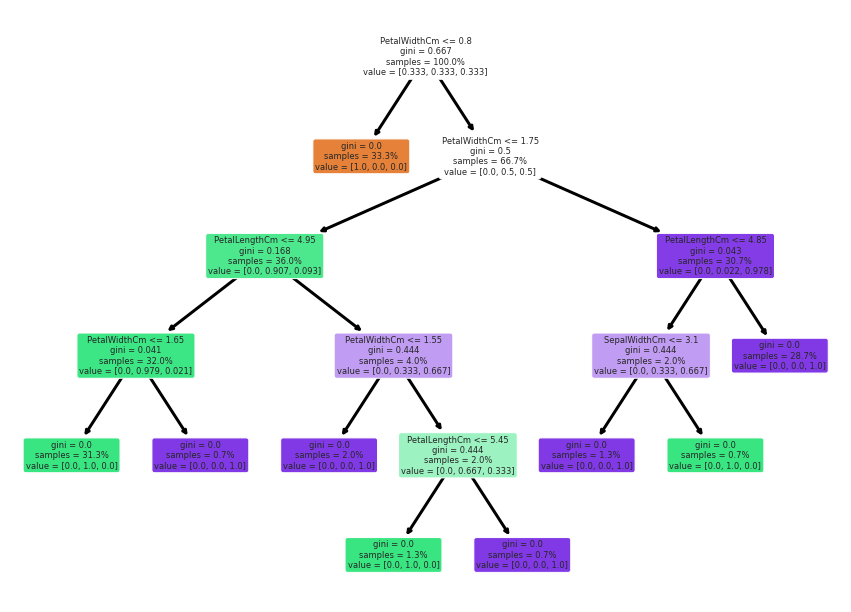

In [71]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize = (15,11))
cols = list(x.columns.values)
out = tree.plot_tree(clf.fit(x, y), feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)


*Method 2:*

In [72]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


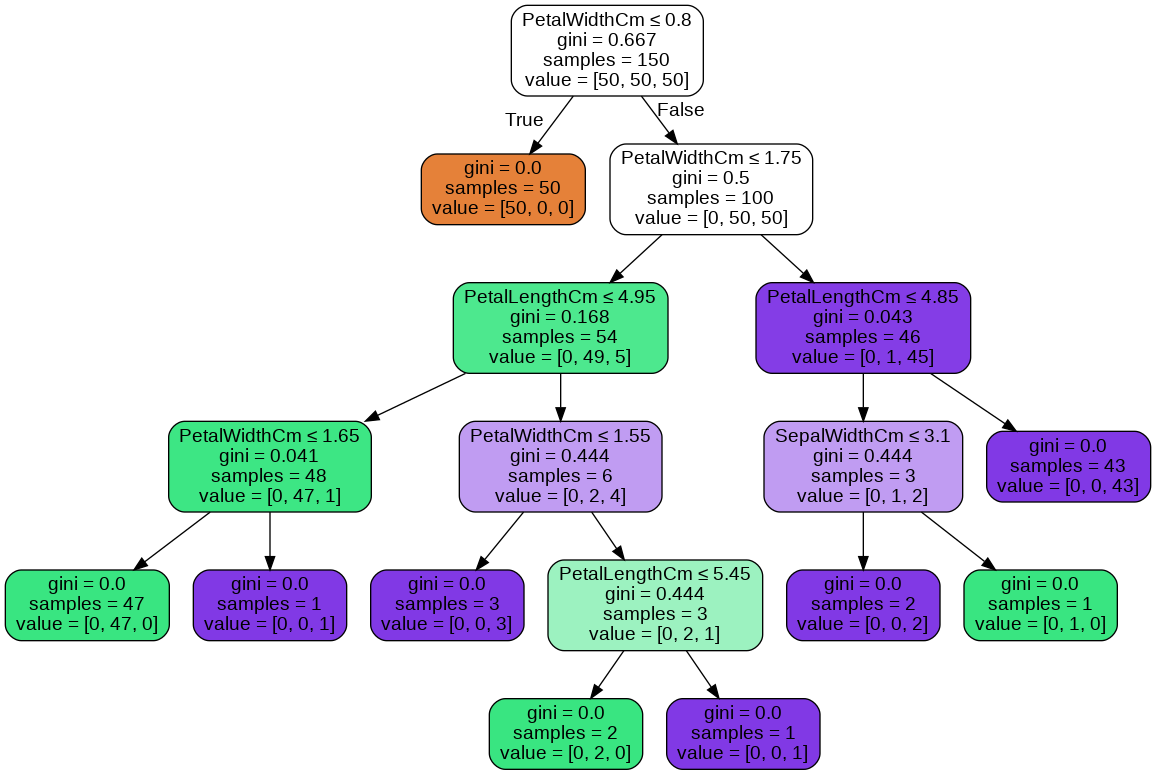

In [73]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names= list(data.columns[:4]),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

*Method 3:*

In [74]:
!pip install -q dtreeviz

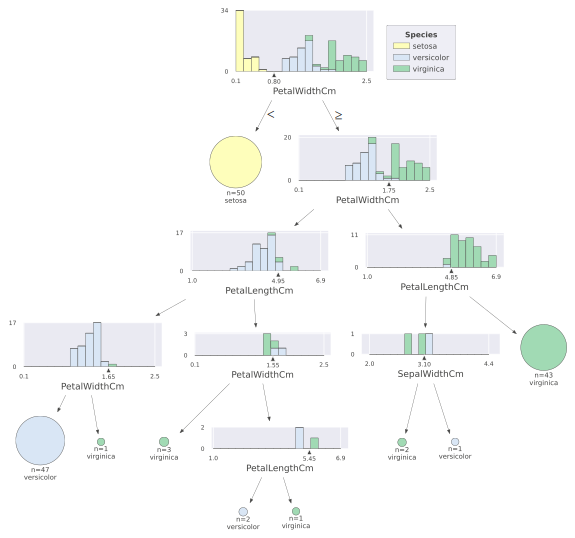

In [75]:
from dtreeviz.trees import dtreeviz

tree = dtreeviz(clf, x, y, target_name="Species", feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], class_names=["setosa", "versicolor", "virginica"])

tree

***Prediction***

In [76]:
x = 'y'
while x == 'y':
  s1 = float(input("Enter Sepal Length (cm) : "))
  s2 = float(input("Enter Sepal Width (cm) : "))
  p1 = float(input("Enter Petal Length (cm) : "))
  p2 = float(input("Enter Petal Width (cm) : "))
  pred = clf.predict([[s1,s2,p1,p2]])
  print()
  if pred == [0]:
    print("SPECIES : Iris-setosa")
  elif pred == [1]:
    print("SPECIES : Iris-versicolor")
  elif pred == [2]:
    print("SPECIES : Iris-virginica")
  else:
    print("INVALID")
  print()
  x = input("Another data? (y/n) : ")
  print()

Enter Sepal Length (cm) : 4.1
Enter Sepal Width (cm) : 4.9
Enter Petal Length (cm) : 2.3
Enter Petal Width (cm) : 3.1

SPECIES : Iris-versicolor

Another data? (y/n) : n

